In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('../../data/dice-results.csv', header=None)
df.columns = ['bias', 'rolls','norm-freq-stddev','roll-1-freq',
    'roll-2-freq','roll-3-freq'
              ,'roll-4-freq','roll-5-freq','roll-6-freq']
#df.dtypes

In [3]:
df.head(10)

,bias,rolls,norm-freq-stddev,roll-1-freq,roll-2-freq,roll-3-freq,roll-4-freq,roll-5-freq,roll-6-freq
0,random,10,0.298142,0.3000,0.2000,0.200,0.2000,0.100,0.0000
1,gambler,10,0.349603,0.3000,0.2000,0.000,0.1000,0.100,0.3000
2,gambler,10,0.235702,0.2000,0.1000,0.200,0.1000,0.300,0.1000
3,random,20,0.440959,0.3000,0.2500,0.150,0.2000,0.100,0.0000
4,gambler,20,0.166667,0.2000,0.2000,0.100,0.1500,0.150,0.2000
5,gambler,20,0.210819,0.1500,0.1000,0.200,0.1500,0.250,0.1500
6,random,40,0.324893,0.2250,0.2000,0.200,0.1750,0.075,0.1250
7,gambler,40,0.235702,0.2000,0.1750,0.125,0.1250,0.150,0.2250
8,gambler,40,0.283823,0.1250,0.1500,0.200,0.1250,0.250,0.1500
9,random,80,0.247207,0.1625,0.1625,0.225,0.1625,0.150,0.1375


In [4]:
by_bias_and_rolls = df.groupby(['bias', 'rolls'])
by_bias = df.groupby(['bias'])

In [5]:
means = by_bias_and_rolls.mean()
means

norm-freq-stddev  roll-1-freq  roll-2-freq  roll-3-freq  \
bias    rolls                                                               
gambler 10                0.242528     0.189474     0.178947     0.147368   
        20                0.227785     0.181579     0.173684     0.150000   
        40                0.211739     0.176316     0.165789     0.161842   
        80                0.183713     0.167763     0.169737     0.162500   
        160               0.180566     0.168421     0.165789     0.163816   
        320               0.188641     0.166118     0.163980     0.166118   
        640               0.183871     0.167434     0.166365     0.164309   
        1280              0.183310     0.168339     0.166612     0.165995   
        2560              0.191813     0.168627     0.165070     0.165687   
        5120              0.192948     0.168092     0.166098     0.166242   
        10240             0.193788     0.167650     0.167008     0.166165   
        20480             0.196818     0.166334     0.166784     0.166560   
        40960             0.167750     0.166602     0.166740     0.166494   
        81920             0.209333     0.166742     0.166790     0.166597   
        163840            0.191893     0.166616     0.166770     0.166638   
        327680            0.202005     0.166569     0.166744     0.166785   
        655360            0.211126     0.166587     0.166694     0.166703   
        1310720           0.205306     0.166655     0.166672     0.166721   
        2621440           0.194229     0.166670     0.166659     0.166690   
        5242880           0.191646     0.166659     0.166670     0.166684   
        10485760          0.181382     0.166649     0.166689     0.166687   
        20971520          0.187943     0.166659     0.166677     0.166682   
        41943040          0.191678     0.166669     0.166669     0.166666   
random  10                0.336552     0.126316     0.142105     0.168421   
        20                0.360988     0.139474     0.155263     0.176316   
        40                0.313806     0.146053     0.161842     0.163158   
        80                0.298011     0.150000     0.162500     0.168421   
        160               0.292776     0.159211     0.159868     0.167105   
        320               0.295444     0.162500     0.160855     0.170066   
        640               0.323299     0.164062     0.164556     0.167681   
        1280              0.338463     0.164104     0.164885     0.169696   
        2560              0.325363     0.164433     0.164679     0.169819   
        5120              0.298873     0.166180     0.165615     0.169336   
        10240             0.353458     0.165188     0.165116     0.167912   
        20480             0.342566     0.166931     0.165340     0.167396   
        40960             0.355179     0.166453     0.165906     0.167613   
        81920             0.327830     0.166424     0.166143     0.166856   
        163840            0.339943     0.166510     0.166329     0.166741   
        327680            0.355851     0.166787     0.166438     0.166674   
        655360            0.379657     0.166588     0.166600     0.166637   
        1310720           0.364811     0.166636     0.166664     0.166717   
        2621440           0.383162     0.166637     0.166684     0.166698   
        5242880           0.334915     0.166608     0.166685     0.166675   
        10485760          0.329799     0.166608     0.166703     0.166668   
        20971520          0.329278     0.166625     0.166676     0.166684   
        41943040          0.360155     0.166636     0.166682     0.166684   

                  roll-4-freq  roll-5-freq  roll-6-freq  
bias    rolls                                            
gambler 10           0.157895     0.173684     0.152632  
        20           0.168421     0.176316     0.150000  
        40           0.163158     0.176316     0.156579  
        80           0.169737  

In [6]:
# mean of grouped by values
import math

gambler_mean_rolls = []
gambler_means = []
fair_mean_rolls = []
fair_means = []
for mi in means.itertuples():
    if mi.Index[0] == 'gambler':
        gambler_mean_rolls.append(mi.Index[1])
        gambler_means.append(mi[1])
    else:
        fair_mean_rolls.append(mi.Index[1])
        fair_means.append(mi[1])

# average of the averages
#fair_mean_means = [np.mean(fair_means)] * len(fair_mean_rolls)
#gambler_mean_means = [np.mean(gambler_means)] * len(gambler_mean_rolls)
      
fair_mean_means = 0.0
gambler_mean_means = 0.0
for r in by_bias.mean().itertuples():
    if r[0] == 'gambler':
        gambler_mean_means = [r[2]] * len(gambler_mean_rolls)
    else:
        fair_mean_means = [r[2]] * len(fair_mean_rolls)
fair_mean_means
gambler_mean_means

    
# not grouped, just all the roll, norm-std-dev pairs        
gambler_rolls = []
gambler_norm_stddevs = []
fair_rolls = []
fair_norm_stddevs = []

for r in df.itertuples():
    if r.bias == 'gambler':
        gambler_rolls.append(r.rolls)
        gambler_norm_stddevs.append(r[3])
    else:
        fair_rolls.append(r.rolls)
        fair_norm_stddevs.append(r[3])

Populating the interactive namespace from numpy and matplotlib


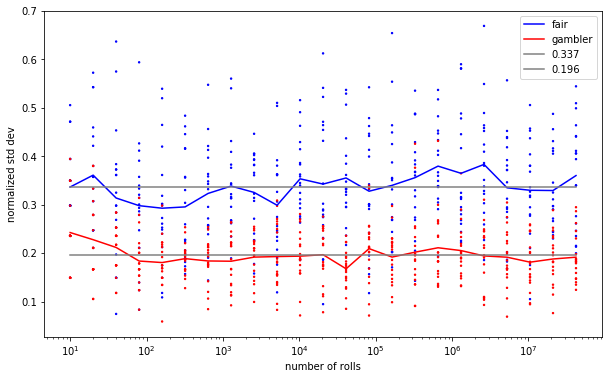

In [7]:
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

import matplotlib.pyplot as plt
plt.xlabel('number of rolls')
plt.ylabel('normalized std dev')
plt.xscale('log')
plt.plot(fair_mean_rolls, fair_means, color='blue', label='fair')
plt.plot(gambler_mean_rolls, gambler_means, color='red', label='gambler')
plt.plot(fair_mean_rolls, fair_mean_means, color='gray', label='%.3f' % fair_mean_means[0])
plt.plot(gambler_mean_rolls, gambler_mean_means, color='gray', label='%.3f' % gambler_mean_means[0])
plt.scatter(fair_rolls, fair_norm_stddevs, color='blue', s=ones(len(fair_rolls))*2)
plt.scatter(gambler_rolls, gambler_norm_stddevs, color='red', s=ones(len(fair_rolls))*2)
plt.legend()